In [1]:
import pandas as pd
import numpy as np
#import required library

In [2]:
df=pd.read_csv("car_data.csv")
#import dataset from storage location

In [3]:
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [4]:
transmission_real=['MANUAL','AUTOMATIC']
df1=df[df['Transmission'].isin(transmission_real)]
#remove unmatched data from transmission column

In [5]:
Insurance_real=['Comp','Expired','Zero_Dep','Insurance Expired','Third_party']
df2=df1[~df1['Insurance'].isin(Insurance_real)]
#remove unmatched data from Insurance column

In [6]:
df2['Transmission'].value_counts()

MANUAL       1653
AUTOMATIC     145
Name: Transmission, dtype: int64

In [7]:
print(df2['Transmission'].nunique())
print(df2['Owner'].unique())
print(df2['Fuel Type'].unique())
print(df2['Model'].nunique())
print(df2.info())
#understanding data structure and values

2
['First Owner' 'Second Owner' 'Third Owner']
['Petrol' 'Petrol + CNG' 'Diesel' 'Petrol + LPG']
338
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1798 entries, 1 to 2236
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              1798 non-null   object 
 1   Selling Price      1798 non-null   int64  
 2   Kilometers Driven  1798 non-null   int64  
 3   Year               1798 non-null   int64  
 4   Owner              1798 non-null   object 
 5   Fuel Type          1798 non-null   object 
 6   Transmission       1798 non-null   object 
 7   Insurance          1798 non-null   object 
 8   Car Condition      1798 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 140.5+ KB
None


In [8]:
#calculate remaining insurance time period from presnt day
pd.reset_option('mode.chained_assignment')
with pd.option_context('mode.chained_assignment',None):
    df2['Insurance']= df2['Insurance'].astype('datetime64[ns]')
    df2['Insurance_Reamains']='15-08-2021'
    df2['Insurance_Reamains']= pd.to_datetime(df2['Insurance_Reamains'])
    df2['Insurance_Reamains']=(df2['Insurance_Reamains']-df2['Insurance']).dt.days
    df2['Insurance_Reamains'].loc[df2['Insurance_Reamains']<=0]=0

In [9]:
df3=pd.read_csv("model_data.csv")
df3.head()
#import 2nd dataset from storage location

,Model,Current Price
0,HyundaiElitei20Sportz(O)1.4CRDi,Rs.7.69 Lakh
1,MarutiErtigaZXISMARTHYBRID,Rs.9.27 Lakh
2,MarutiVitaraBrezzaLDI,"Rs.7,62,742"
3,FordEcosport1.5TITANIUMTIVCT,Rs.7.64 Lakh
4,HyundaiVernaFLUIDIC1.4CRDI,"Rs.9,99,900"


In [10]:
df3=df3.dropna()
df4=df3[df3['Current Price']!='0']
df4.info()
#droping null value and empty row from dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 433
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          424 non-null    object
 1   Current Price  424 non-null    object
dtypes: object(2)
memory usage: 9.9+ KB


In [11]:
#convert money data in different format to standard format
pd.reset_option('mode.chained_assignment')
with pd.option_context('mode.chained_assignment',None):
    in_lakh=df4[df4['Current Price'].str.contains('Lakh',case=False)]
    notin_lakh=df4[~df4['Current Price'].str.contains('Lakh',case=False)]
    in_lakh['Current Price']=in_lakh['Current Price'].str.split(' ').str[0]
    in_lakh['Current Price']=((in_lakh['Current Price'].str.replace('Rs.','')).astype(float)*100000).astype(int)
    notin_lakh['Current Price']=((notin_lakh['Current Price'].str.replace('Rs.','')).str.replace(',','')).astype(int)
    df4=in_lakh.append(notin_lakh)
    df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 0 to 430
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Model          424 non-null    object
 1   Current Price  424 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 8.3+ KB


<ipython-input-11-ab042829eaa0>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  in_lakh['Current Price']=((in_lakh['Current Price'].str.replace('Rs.','')).astype(float)*100000).astype(int)
<ipython-input-11-ab042829eaa0>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  notin_lakh['Current Price']=((notin_lakh['Current Price'].str.replace('Rs.','')).str.replace(',','')).astype(int)


In [12]:
#merge 2 dataset in to 1 dataset based on car model
df5=df2.merge(df4,how="left",on="Model")
df5.isnull().sum()

Model                  0
Selling Price          0
Kilometers Driven      0
Year                   0
Owner                  0
Fuel Type              0
Transmission           0
Insurance              0
Car Condition          0
Insurance_Reamains     0
Current Price         20
dtype: int64

In [13]:
df6=df5.dropna()
df6['Current Price']=df6['Current Price'].astype(int)
df6.info()
#droping null value and empty row from dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1778 entries, 0 to 1797
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Model               1778 non-null   object        
 1   Selling Price       1778 non-null   int64         
 2   Kilometers Driven   1778 non-null   int64         
 3   Year                1778 non-null   int64         
 4   Owner               1778 non-null   object        
 5   Fuel Type           1778 non-null   object        
 6   Transmission        1778 non-null   object        
 7   Insurance           1778 non-null   datetime64[ns]
 8   Car Condition       1778 non-null   float64       
 9   Insurance_Reamains  1778 non-null   int64         
 10  Current Price       1778 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(4), object(4)
memory usage: 159.7+ KB


<ipython-input-13-398cdce08ca2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Current Price']=df6['Current Price'].astype(int)


In [14]:
df6.columns

Index(['Model', 'Selling Price', 'Kilometers Driven', 'Year', 'Owner',
       'Fuel Type', 'Transmission', 'Insurance', 'Car Condition',
       'Insurance_Reamains', 'Current Price'],
      dtype='object')

In [15]:
#conert year to age of vechicle
pd.reset_option('mode.chained_assignment')
with pd.option_context('mode.chained_assignment',None):
    df6['current year']=2021
    df6['Year']=df6['current year']-df6['Year']
    df6

In [16]:
final_data=df6[['Selling Price', 'Current Price','Kilometers Driven', 'Year', 'Owner',
       'Fuel Type', 'Transmission', 'Car Condition',
       'Insurance_Reamains']]

In [17]:
#convert catogerical data to one dot encoding format
final_data=pd.get_dummies(final_data,drop_first=True)
final_data

,Selling Price,Current Price,Kilometers Driven,Year,Car Condition,Insurance_Reamains,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL
0,313799,568000,30558,8,4.4,0,0,0,1,0,0,1
1,295999,448000,22164,3,4.8,581,0,0,1,0,0,1
2,289099,498000,15738,8,4.3,0,0,0,1,0,0,1
3,606599,907235,27487,6,4.6,146,0,0,1,0,0,1
4,459199,453000,41383,3,4.4,73,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1793,590999,814742,68638,5,4.4,0,0,0,0,0,0,1
1794,385999,498000,45263,6,4.4,0,1,0,1,0,0,1
1795,324099,549000,100335,9,4.3,188,1,0,1,0,0,1
1796,378899,975000,87947,8,4.2,159,0,0,0,0,0,1


In [18]:
final_data.corr()

,Selling Price,Current Price,Kilometers Driven,Year,Car Condition,Insurance_Reamains,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL
Selling Price,1.000000,0.535271,-0.163964,-0.555934,0.419672,-0.020318,-0.116510,-0.067938,-0.299200,-0.105420,-0.046684,-0.302094
Current Price,0.535271,1.000000,0.192465,0.053261,-0.005883,0.016063,0.019903,0.042018,-0.242586,-0.108114,-0.031916,-0.293014
Kilometers Driven,-0.163964,0.192465,1.000000,0.439670,-0.469630,0.025401,0.036975,0.062800,-0.382321,0.110051,0.036219,0.076487
Year,-0.555934,0.053261,0.439670,1.000000,-0.649597,0.019177,0.160996,0.141300,0.089923,-0.040477,0.075948,0.151099
Car Condition,0.419672,-0.005883,-0.469630,-0.649597,1.000000,-0.030830,-0.165765,-0.114789,0.008940,-0.028380,-0.072638,-0.132378
Insurance_Reamains,-0.020318,0.016063,0.025401,0.019177,-0.030830,1.000000,0.038367,0.009081,-0.003452,0.013858,-0.021187,-0.049417
Owner_Second Owner,-0.116510,0.019903,0.036975,0.160996,-0.165765,0.038367,1.000000,-0.091219,0.041378,0.042135,-0.026618,-0.058273
Owner_Third Owner,-0.067938,0.042018,0.062800,0.141300,-0.114789,0.009081,-0.091219,1.000000,0.045465,-0.012933,-0.009664,-0.004880
Fuel Type_Petrol,-0.299200,-0.242586,-0.382321,0.089923,0.008940,-0.003452,0.041378,0.045465,1.000000,-0.349270,-0.067160,-0.034059
Fuel Type_Petrol + CNG,-0.105420,-0.108114,0.110051,-0.040477,-0.028380,0.013858,0.042135,-0.012933,-0.349270,1.000000,-0.014666,0.065556


In [19]:
import seaborn as sns

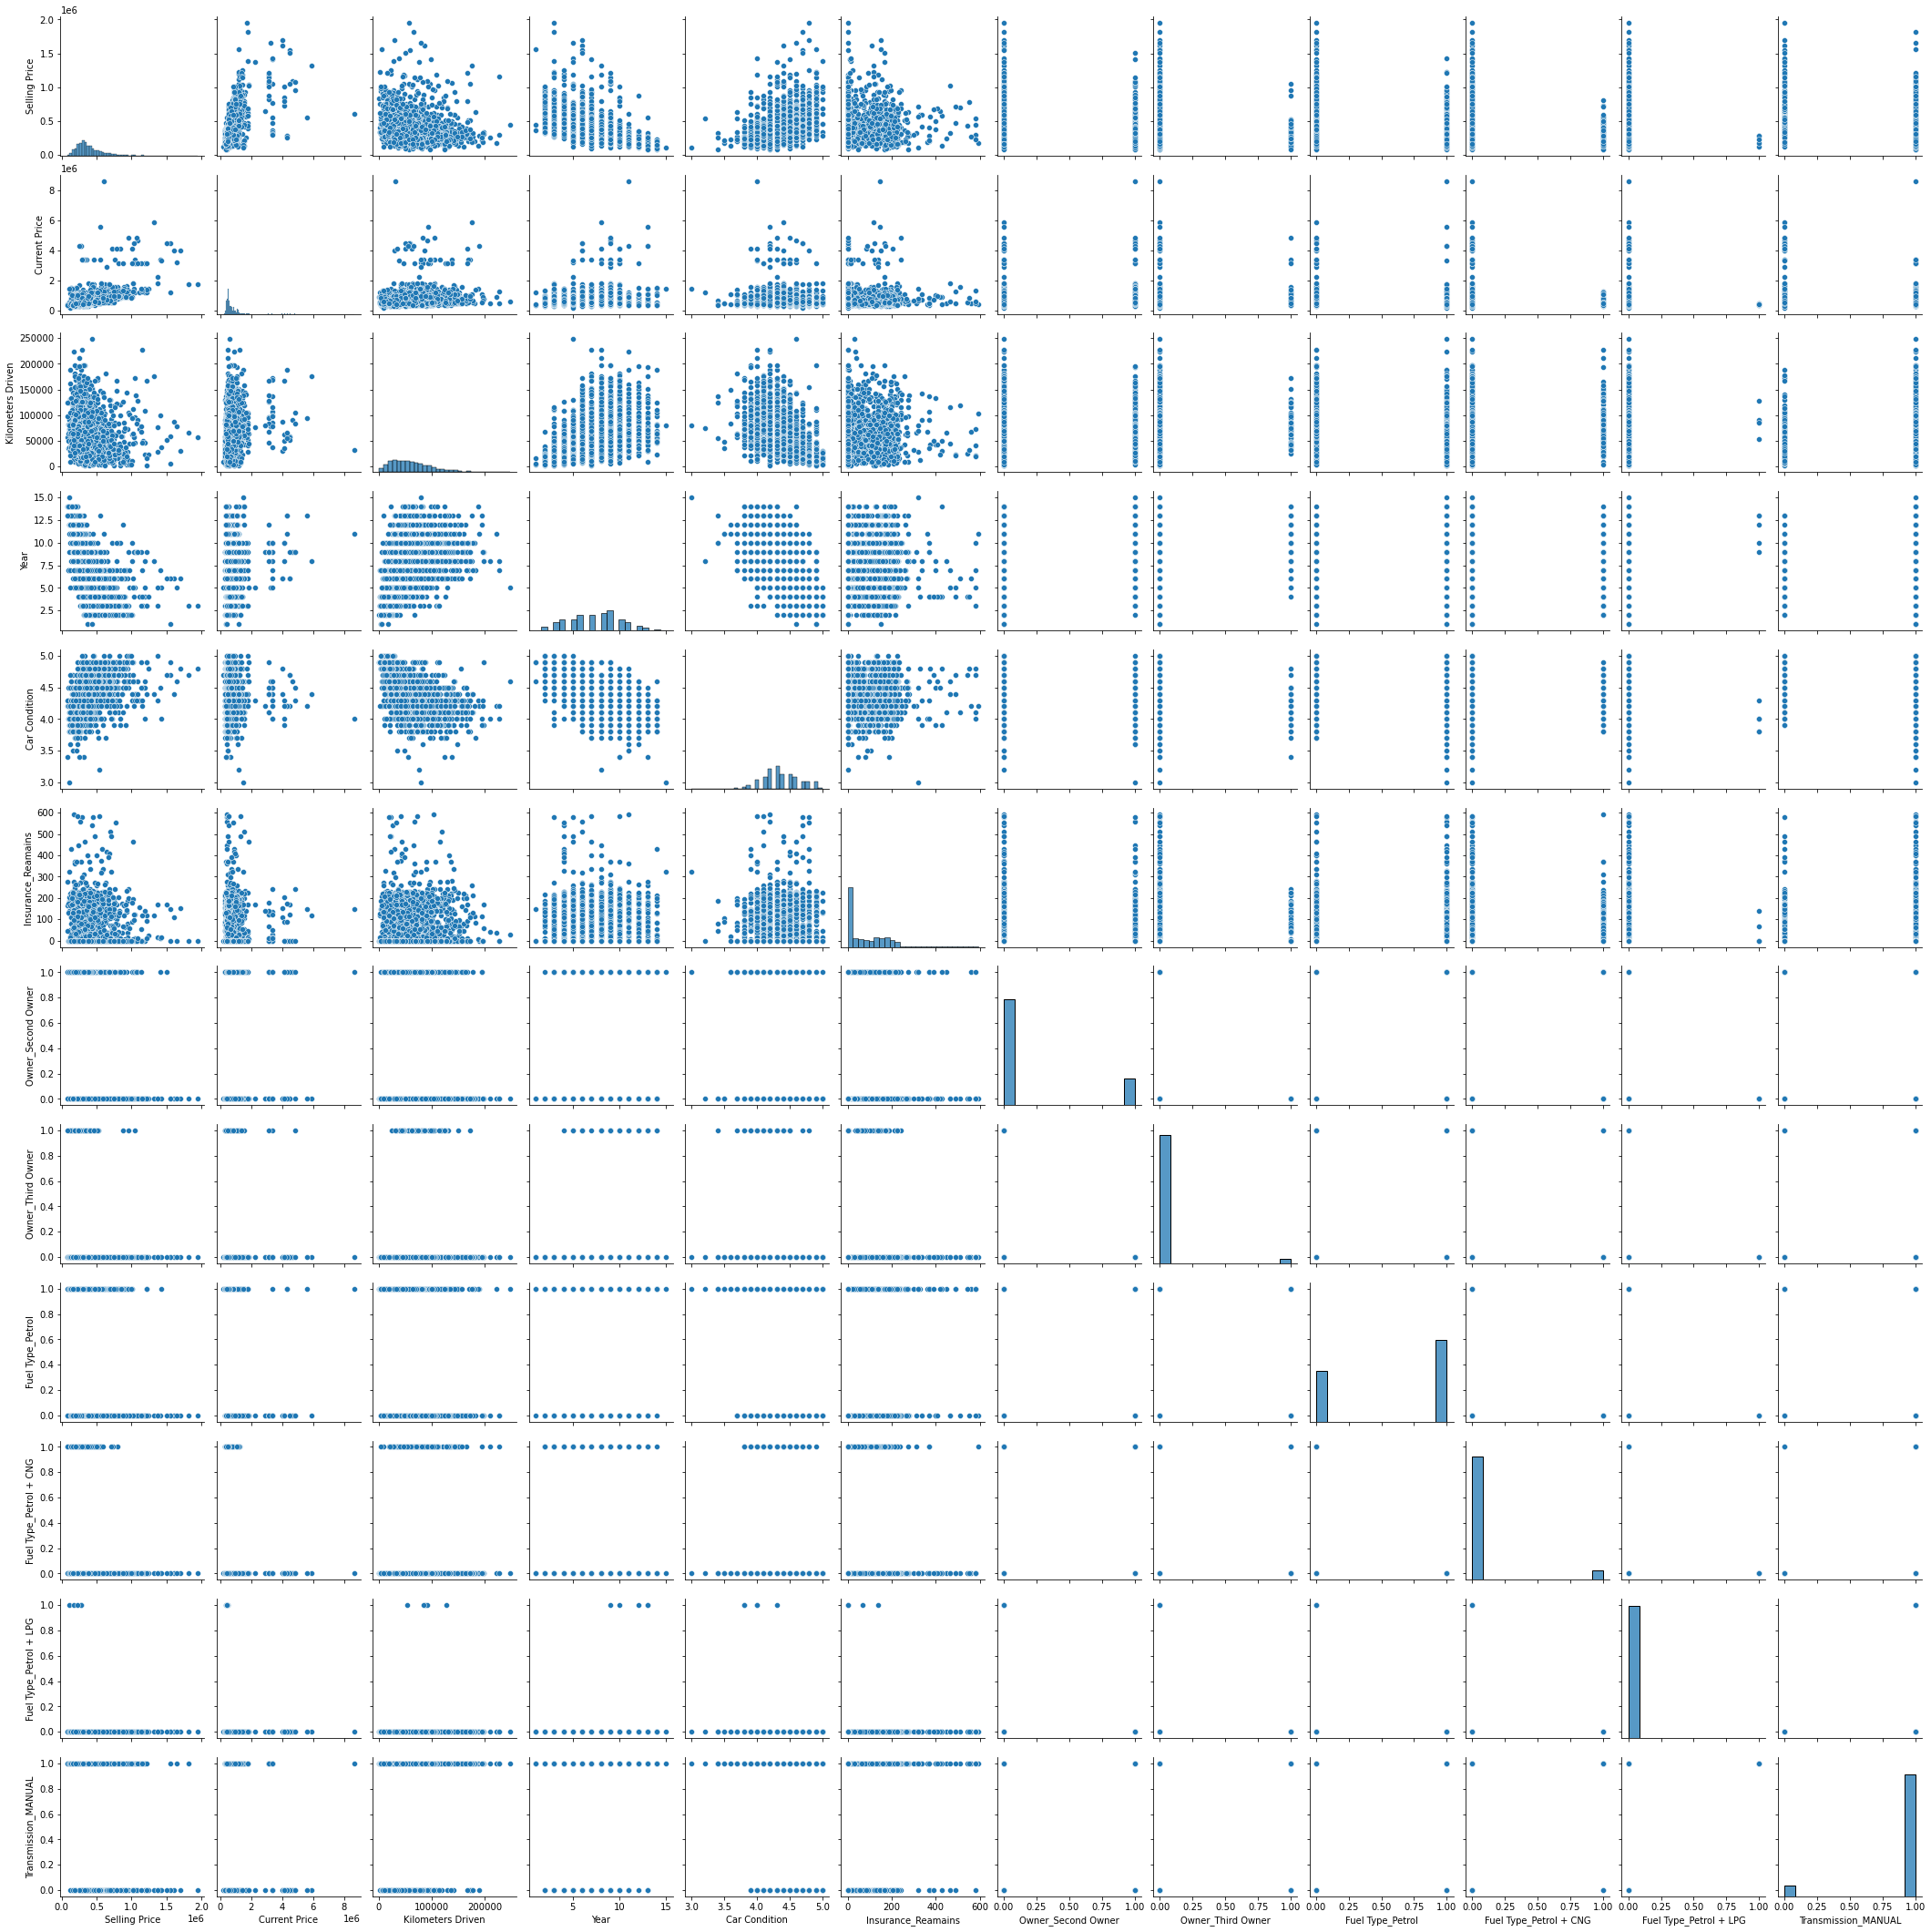

In [20]:
sns.pairplot(final_data)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

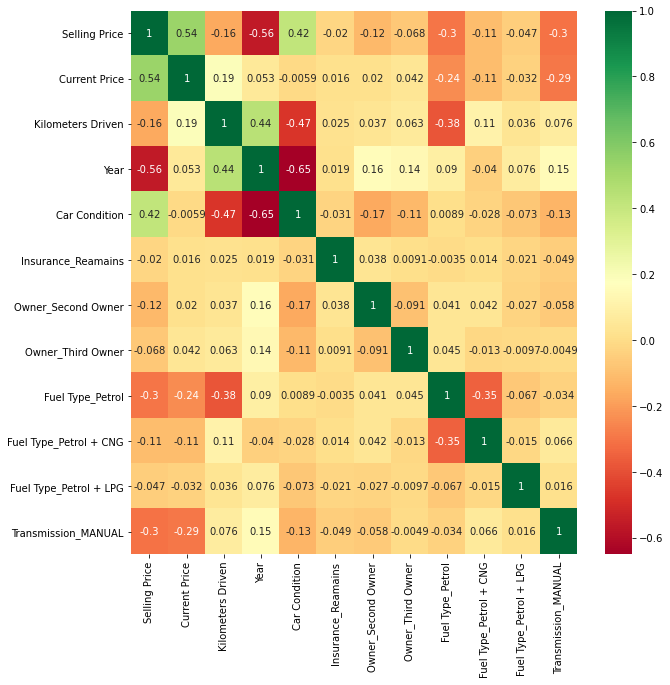

In [22]:
corrmat=final_data.corr()
top_corr=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(final_data[top_corr].corr(),annot=True,cmap='RdYlGn')

In [23]:
#split dependent and indepentent data
x=final_data.iloc[:,1:]
y=final_data.iloc[:,0]

In [24]:
x.head()

,Current Price,Kilometers Driven,Year,Car Condition,Insurance_Reamains,Owner_Second Owner,Owner_Third Owner,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG,Transmission_MANUAL
0,568000,30558,8,4.4,0,0,0,1,0,0,1
1,448000,22164,3,4.8,581,0,0,1,0,0,1
2,498000,15738,8,4.3,0,0,0,1,0,0,1
3,907235,27487,6,4.6,146,0,0,1,0,0,1
4,453000,41383,3,4.4,73,0,0,1,0,0,1


In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [26]:
print(model.feature_importances_)

[4.41889473e-01 3.40753351e-02 3.20029525e-01 5.42910028e-02
 1.95557470e-02 7.90566752e-03 2.28345041e-03 5.83153570e-02
 1.46379194e-02 1.29074587e-04 4.68874476e-02]


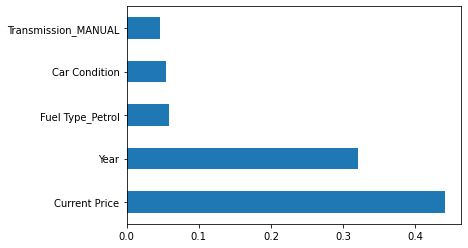

In [27]:
feat_importance = pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [28]:
#split data for training model and testing model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [29]:
x_train.shape

(1422, 11)

In [30]:
#basedon data feature linear regression is selected as machine learning model
from sklearn.linear_model import LinearRegression
lrc=LinearRegression()
lrc.fit(x_train,y_train)

LinearRegression()

In [31]:
#visulaize accuracy of model
l_pred=lrc.predict(x_test)
l_accuracy = lrc.score(x_test,y_test)
print("Accuracy",l_accuracy*100,"%")

from sklearn.model_selection import cross_val_score
l_score = lrc.score(x_train,y_train)
print("score:",l_score)

Accuracy 71.02374414644437 %
score: 0.6574711460891045


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling Price', ylabel='Density'>

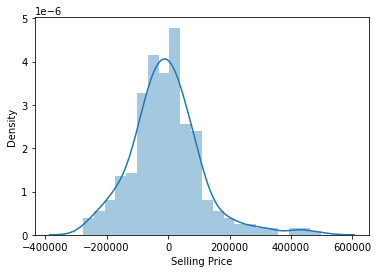

In [32]:
l_predictions=lrc.predict(x_test)
sns.distplot(y_test-l_predictions)

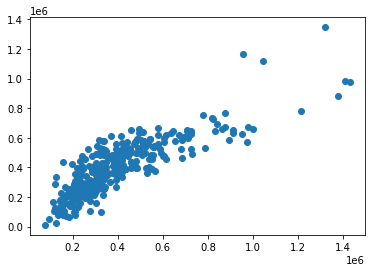

In [33]:
plt.scatter(y_test,l_predictions)

In [34]:
#import model as pickle file
import pickle
#open a file,where you ant to store the data
file = open('linear_regression_model.pkl','wb')

#dump information to that file
pickle.dump(lrc,file)